In [1]:
import timeit
import numpy as np
import matplotlib.pyplot as plt

def calc_squared_sum_basic(vals):
    sum_ = 0
    for val in vals:
        sum_ += val ** 2
    return sum_

def calc_squared_sum_comprehension(vals):
    return sum(val ** 2 for val in vals)

def calc_squared_sum_vectorized(vals):
    return np.sum(np.asarray(vals) ** 2)

def time_execution(func, args=(), kwargs={}, setup='pass', n_runs=100, n_repeats=10):
    timer = timeit.Timer(stmt=lambda: func(*args, **kwargs), setup=setup)
    times = timer.repeat(repeat=n_repeats, number=n_runs)
    return min(times)

vals_1 = np.random.randint(low=0, high=1_000, size=10_000)
vals_2 = np.random.randint(low=0, high=1_000, size=100_000)
vals_3 = np.random.randint(low=0, high=1_000, size=1_000_000)

implementations = {
    "loop": calc_squared_sum_basic,
    "comprehension": calc_squared_sum_comprehension,
    "vectorized": calc_squared_sum_vectorized
}
runtimes = {}

for vals in (vals_1, vals_2, vals_3):
    size = len(vals)
    runtimes[size] = {}

    for impl_name, impl_func in implementations.items():
        time_taken = time_execution(impl_func, args=(vals,))
        runtimes[size][impl_name] = time_taken * 1000  #  Conversion from seconds to milliseconds

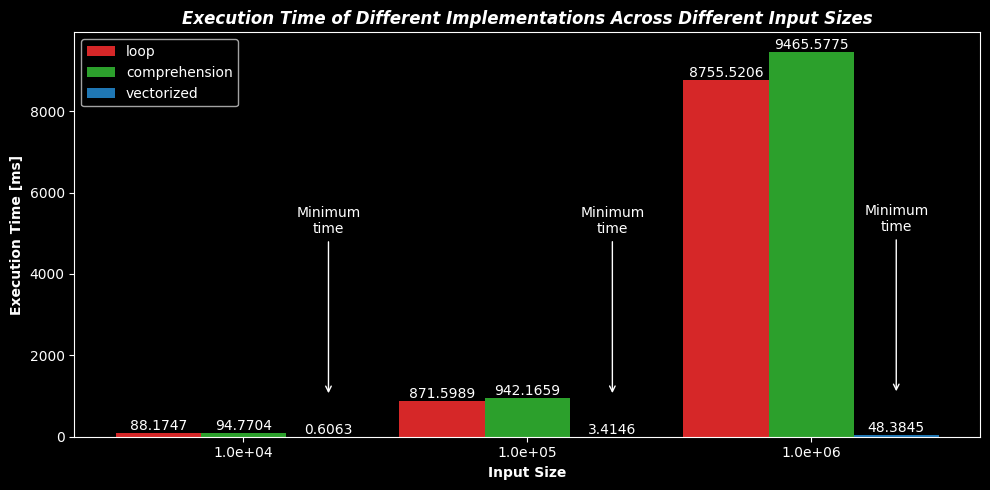

In [11]:
plt.style.use("dark_background")

bar_width = 0.3
input_sizes = sorted(runtimes.keys())
index = np.arange(len(input_sizes))

fig, ax = plt.subplots(figsize=(10, 5))
colors = ["#d62728", "#2ca02c", "#1f77b4"]  # Darker shades of red, green, and blue
bar_groups = []

for i, impl_name in enumerate(implementations.keys()):
    runtime_values = [runtimes[size][impl_name] for size in input_sizes]
    bars = ax.bar(
        index + i * bar_width, runtime_values, bar_width, label=impl_name, color=colors[i]
    )
    bar_groups.append(bars)

for bars in bar_groups:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.,
            height,
            "{:.4f}".format(height),
            ha="center",
            va="bottom"
        )

for vectorized_bar in bar_groups[-1]:
    ax.annotate(
        "Minimum\ntime",
        xy=(
            vectorized_bar.get_x() + vectorized_bar.get_width() / 2.,
            vectorized_bar.get_height() + 1000,
        ),
        xytext=(
            vectorized_bar.get_x() + vectorized_bar.get_width() / 2.,
            vectorized_bar.get_height() + 5000,
        ),
        arrowprops={"arrowstyle":"->", "connectionstyle":"arc3,rad=0.0"},
        horizontalalignment="center",
        annotation_clip=False, zorder=5,
    )

ax.set_xlabel("Input Size", fontweight="bold")
ax.set_ylabel("Execution Time [ms]", fontweight="bold")
ax.set_title(
    "Execution Time of Different Implementations Across Different Input Sizes",
    fontweight="bold",
    fontstyle="italic",
)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(['{:.1e}'.format(size) for size in input_sizes])
ax.legend()

plt.tight_layout()
plt.show()

fig.savefig(
    "/mnt/e/projects/vectorization_presentation/slides/images/benchmarking_comparison.svg",
    transparent=True
)